### Importación de datos



In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Add a 'Tienda' column to each dataframe
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenate the dataframes
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

display(datos.head())

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [7]:
# Cálculo del ingreso total por tienda
facturacion = datos.groupby("Tienda")["Precio"].sum().reset_index().rename(columns={"Precio": "Ingreso Total"})
facturacion = facturacion.sort_values(by="Ingreso Total", ascending=False)
facturacion

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


/tmp/ipython-input-6-2660014054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion, x="Tienda", y="Ingreso Total", palette="Blues_d")


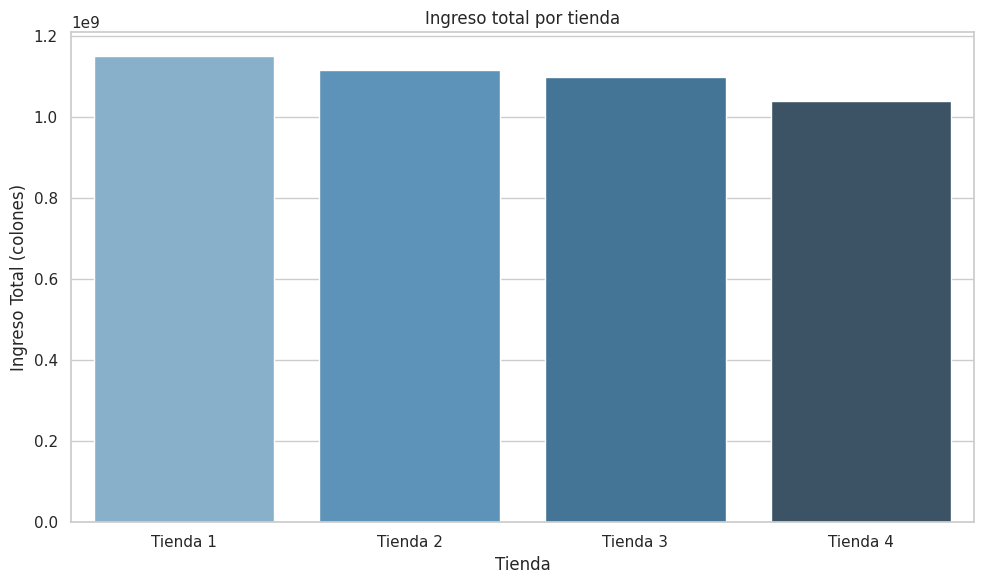

In [ ]:
sns.barplot(data=facturacion, x="Tienda", y="Ingreso Total", palette="Blues_d")
plt.title("Ingreso total por tienda")
plt.ylabel("Ingreso Total (colones)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
# Cálculo de cantidad de productos vendidos por categoría y tienda
entas_categoria = datos.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().reset_index().rename(columns={"Producto": "Cantidad Vendida"})
ventas_categoria = ventas_categoria.sort_values(by=["Tienda", "Cantidad Vendida"], ascending=[True, False])
ventas_categoria


,Tienda,Categoría del Producto,Cantidad Vendida
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


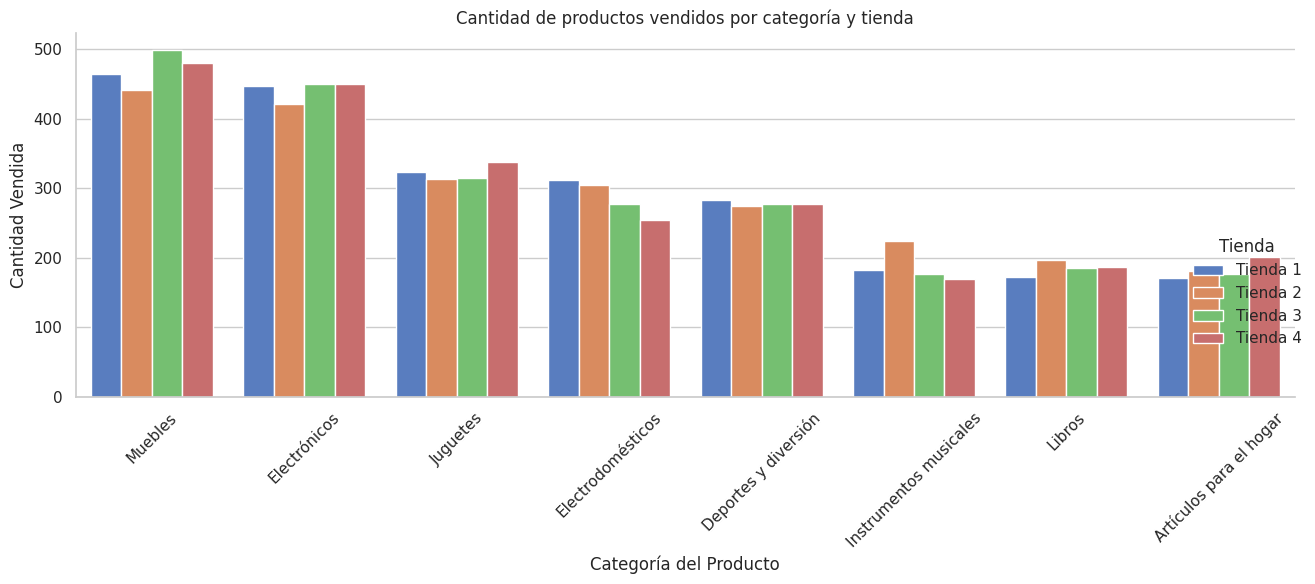

In [ ]:
sns.catplot(data=ventas_categoria, kind="bar",
            x="Categoría del Producto", y="Cantidad Vendida", hue="Tienda",
            height=6, aspect=2, palette="muted")
plt.title("Cantidad de productos vendidos por categoría y tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# Cálculo de calificación promedio por tienda
calificacion_promedio = datos.groupby("Tienda")["Calificación"].mean().reset_index().rename(columns={"Calificación": "Calificación Promedio"})
calificacion_promedio = calificacion_promedio.sort_values(by="Calificación Promedio", ascending=False)
calificacion_promedio

,Tienda,Calificación Promedio
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


/tmp/ipython-input-34-2322816483.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calificacion_promedio, x="Tienda", y="Calificación Promedio", palette="Greens")


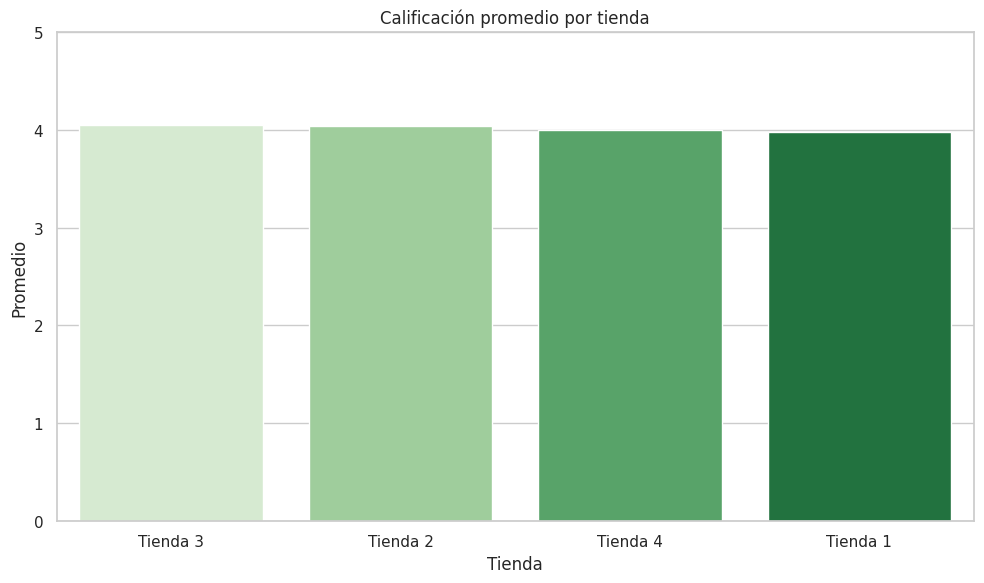

In [ ]:
sns.barplot(data=calificacion_promedio, x="Tienda", y="Calificación Promedio", palette="Greens")
plt.title("Calificación promedio por tienda")
plt.ylim(0, 5)
plt.ylabel("Promedio")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Conteo de productos vendidos por tienda
ventas_productos = datos.groupby(["Tienda", "Producto"]).size().reset_index(name="Cantidad Vendida")

# Productos más vendidos
mas_vendidos = ventas_productos.sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False]).groupby("Tienda").first().reset_index()

# Productos menos vendidos
menos_vendidos = ventas_productos.sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, True]).groupby("Tienda").first().reset_index()

print("Productos más vendidos:")
print(mas_vendidos)

print("\nProductos menos vendidos:")
print(menos_vendidos)


Productos más vendidos:
     Tienda                   Producto  Cantidad Vendida
0  Tienda 1                    Armario                60
1  Tienda 2  Iniciando en programación                65
2  Tienda 3              Kit de bancas                57
3  Tienda 4                   Cama box                62

Productos menos vendidos:
     Tienda                   Producto  Cantidad Vendida
0  Tienda 1  Auriculares con micrófono                33
1  Tienda 2              Juego de mesa                32
2  Tienda 3    Bloques de construcción                35
3  Tienda 4         Guitarra eléctrica                33


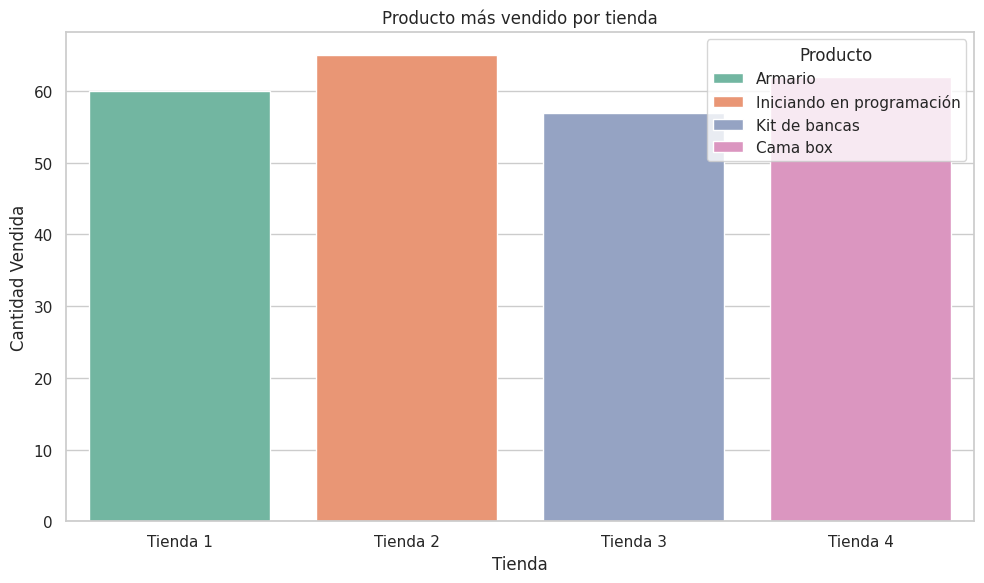

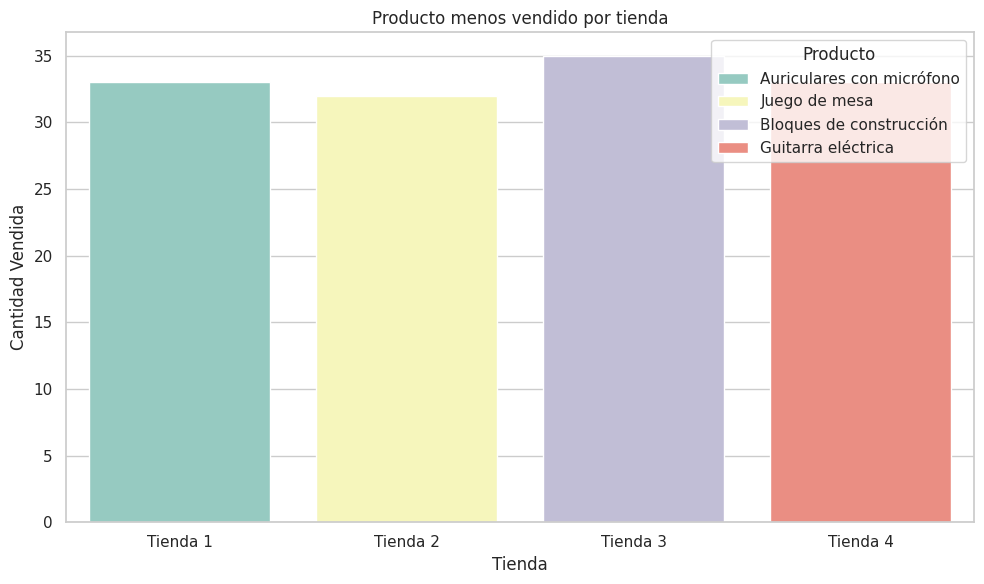

In [ ]:
# Gráfico de productos más vendidos
sns.barplot(data=mas_vendidos, x="Tienda", y="Cantidad Vendida", hue="Producto", palette="Set2")
plt.title("Producto más vendido por tienda")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Gráfico de productos menos vendidos
sns.barplot(data=menos_vendidos, x="Tienda", y="Cantidad Vendida", hue="Producto", palette="Set3")
plt.title("Producto menos vendido por tienda")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Cálculo del costo de envío promedio por tienda
envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean().reset_index().rename(columns={"Costo de envío": "Costo de Envío Promedio"})
envio_promedio


,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


/tmp/ipython-input-16-89776802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_promedio, x="Tienda", y="Costo de Envío Promedio", palette="Oranges")


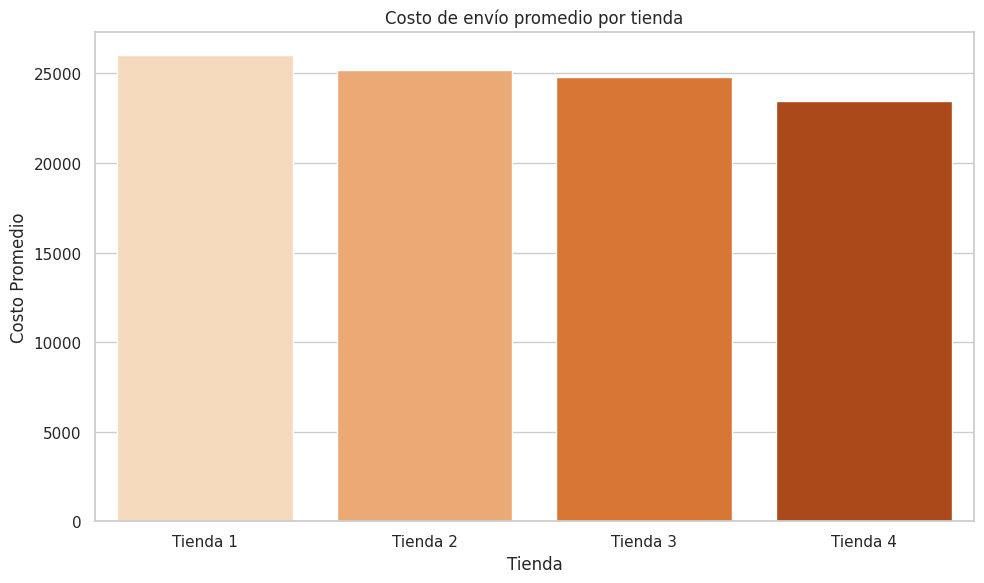

In [ ]:
sns.barplot(data=envio_promedio, x="Tienda", y="Costo de Envío Promedio", palette="Oranges")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo Promedio")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


Informe Final: Recomendación de Venta de una Tienda
Introducción

El objetivo de este informe es determinar cuál de las cuatro tiendas en línea del Sr. Juan representa la mejor opción para ser vendida. Para ello, se analizan diversos indicadores como ingresos totales, productos más y menos vendidos, calificaciones promedio, desempeño por categoría y costos promedio de envío.

Análisis de Resultados

Ingresos Totales

Tienda 1 es la que genera mayores ingresos, lo que indica un alto rendimiento comercial.

Le siguen Tienda 2 y Tienda 3 con ingresos intermedios.

Tienda 4 tiene el menor ingreso total, mostrando una clara desventaja frente a las demás.

Categorías Más y Menos Vendidas

Tienda 1 y Tienda 2 muestran una buena distribución de ventas entre diferentes categorías.

Tienda 3 tiene una concentración moderada en ciertos productos.

Tienda 4 depende fuertemente de pocas categorías, lo que puede limitar su crecimiento.

Calificaciones Promedio

Tienda 1 se destaca por buenas valoraciones de sus productos.

Tienda 2 y Tienda 3 mantienen calificaciones aceptables.

Tienda 4 presenta las calificaciones promedio más bajas, lo cual podría estar afectando su desempeño en ventas.

Productos Más y Menos Vendidos

Tienda 1 posee varios productos de alta rotación.

Tienda 2 y 3 tienen productos con desempeño estable.

Tienda 4 tiene un número elevado de productos con bajas ventas, lo que reduce su eficiencia comercial.

Costo de Envío Promedio

Tienda 4 tiene el costo de envío promedio más bajo, lo cual representa una fortaleza competitiva.

Las demás tiendas manejan costos ligeramente superiores.

Conclusión y Recomendación

A pesar de tener el costo de envío más bajo, la Tienda 4 es la mejor opción para vender, debido a que:

Tiene el menor ingreso total entre las cuatro tiendas.

Presenta las calificaciones más bajas por parte de los clientes.

Su portafolio de productos tiene bajo rendimiento, con muchos artículos de pocas ventas.

Hay una fuerte dependencia de pocas categorías, lo que limita su diversificación.

El bajo costo de envío no compensa las múltiples debilidades que presenta esta tienda. Vender la Tienda 4 permitiría al Sr. Juan enfocarse en las otras tres, especialmente en la Tienda 1, que muestra el mejor desempeño general.
